EXPOLATORY DATA ANALYSIS
- preprocessing
- analysis
- feature engineering
- handling outliers

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [2]:
df=sns.load_dataset('titanic')


In [3]:
df.sample(6)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
832,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
266,0,3,male,16.0,4,1,39.6875,S,Third,man,True,NaN,Southampton,no,False
724,1,1,male,27.0,1,0,53.1000,S,First,man,True,E,Southampton,yes,False
167,0,3,female,45.0,1,4,27.9000,S,Third,woman,False,NaN,Southampton,no,False
256,1,1,female,NaN,0,0,79.2000,C,First,woman,False,NaN,Cherbourg,yes,True
801,1,2,female,31.0,1,1,26.2500,S,Second,woman,False,NaN,Southampton,yes,False


In [4]:
df.shape


(891, 15)

In [5]:
df.columns


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
print(df["embark_town"].unique())

['Southampton' 'Cherbourg' 'Queenstown' nan]


In [10]:
print(df["sex"].value_counts())

male      577
female    314
Name: sex, dtype: int64


In [11]:
print(df["pclass"].value_counts())

3    491
1    216
2    184
Name: pclass, dtype: int64


In [12]:
df.drop(columns=["deck"],inplace=True)

In [13]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [14]:
df.drop(columns=["alone"],inplace=True)
df.drop(columns=["class"],inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,embark_town,alive
0,0,3,male,22.0,1,0,7.2500,S,man,True,Southampton,no
1,1,1,female,38.0,1,0,71.2833,C,woman,False,Cherbourg,yes
2,1,3,female,26.0,0,0,7.9250,S,woman,False,Southampton,yes
3,1,1,female,35.0,1,0,53.1000,S,woman,False,Southampton,yes
4,0,3,male,35.0,0,0,8.0500,S,man,True,Southampton,no
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,man,True,Southampton,no
887,1,1,female,19.0,0,0,30.0000,S,woman,False,Southampton,yes
888,0,3,female,NaN,1,2,23.4500,S,woman,False,Southampton,no
889,1,1,male,26.0,0,0,30.0000,C,man,True,Cherbourg,yes


In [15]:
df.drop(columns=["who"],inplace=True)
df.drop(columns=["embark_town"],inplace=True)
df.drop(columns=["alive"],inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male
0,0,3,male,22.0,1,0,7.2500,S,True
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,False
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,True
887,1,1,female,19.0,0,0,30.0000,S,False
888,0,3,female,NaN,1,2,23.4500,S,False
889,1,1,male,26.0,0,0,30.0000,C,True


df.isna()


FILLING NULL VALUES

In [16]:
df['embarked'].fillna('S',inplace=True)

In [17]:
df['age'].fillna(df['age'].mean(),inplace=True)

In [18]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male
0,0,3,male,22.000000,1,0,7.2500,S,True
1,1,1,female,38.000000,1,0,71.2833,C,False
2,1,3,female,26.000000,0,0,7.9250,S,False
3,1,1,female,35.000000,1,0,53.1000,S,False
4,0,3,male,35.000000,0,0,8.0500,S,True
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,True
887,1,1,female,19.000000,0,0,30.0000,S,False
888,0,3,female,29.699118,1,2,23.4500,S,False
889,1,1,male,26.000000,0,0,30.0000,C,True


In [19]:
df.isna().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
adult_male    0
dtype: int64

In [20]:
df.describe(include ="all")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,646,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,13.002015,1.102743,0.806057,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,29.699118,0.000000,0.000000,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN,NaN


In [21]:
numeric_columns =df.select_dtypes(include=['number'])
correlation_matrix=numeric_columns.corr()
correlation_matrix

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
sibsp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


no of people survived are  62 %


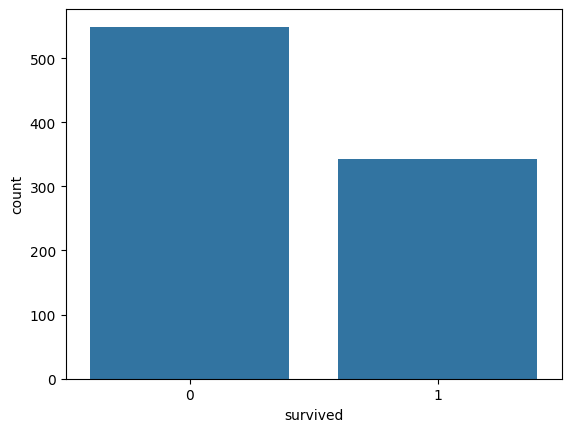

In [22]:
sns.countplot(x="survived", data=df)
print('no of people survived are ', round(df['survived'].value_counts().values[0]*100/891),'%')

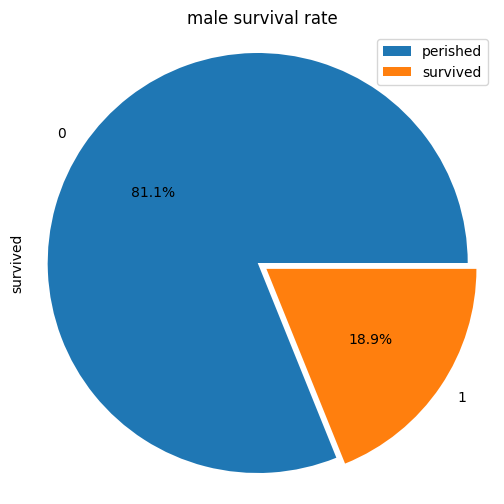

In [23]:
df[df['sex']=='male'].survived.groupby(df.survived).count().plot(kind='pie',figsize=(6,6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis("equal")
plt.legend(["perished","survived"])
plt.title("male survival rate")
plt.show()

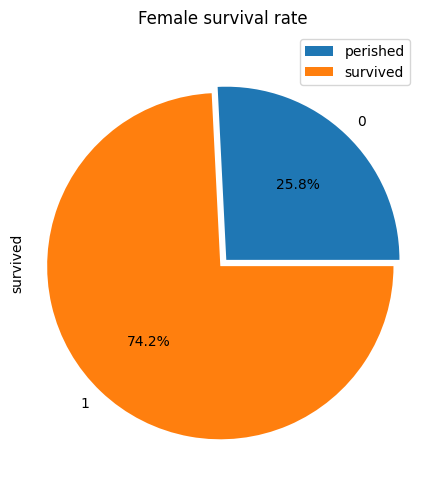

In [24]:
df[df['sex']=='female'].survived.groupby(df.survived).count().plot(kind='pie',figsize=(5,6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis("equal")
plt.legend(["perished","survived"])
plt.title("Female survival rate")
plt.show()

ValueError: 'explode' must be of length 'x'

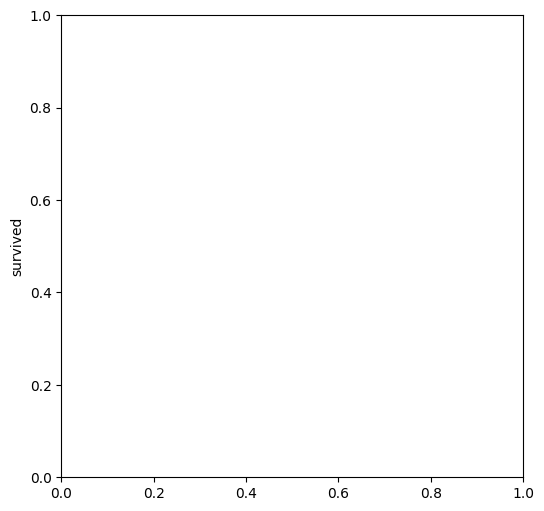

In [44]:
df[df['pclass']=='1'].survived.groupby(df.survived).count().plot(kind='pie',figsize=(6,6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis("equal")
plt.legend(["perished","survived"])
plt.title("Female survival rate")
plt.show()
df[df['pclass']=='2'].survived.groupby(df.survived).count().plot(kind='pie',figsize=(6,6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis("equal")
plt.legend(["perished","survived"])
plt.title("Female survival rate")
plt.show()
df[df['pclass']=='3'].survived.groupby(df.survived).count().plot(kind='pie',figsize=(6,6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis("equal")
plt.legend(["perished","survived"])
plt.title("Female survival rate")
plt.show()

/tmp/ipykernel_102006/975536544.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(age_surv["age"],color='g')
/tmp/ipykernel_102006/975536544.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(age_died["age"],color='r')


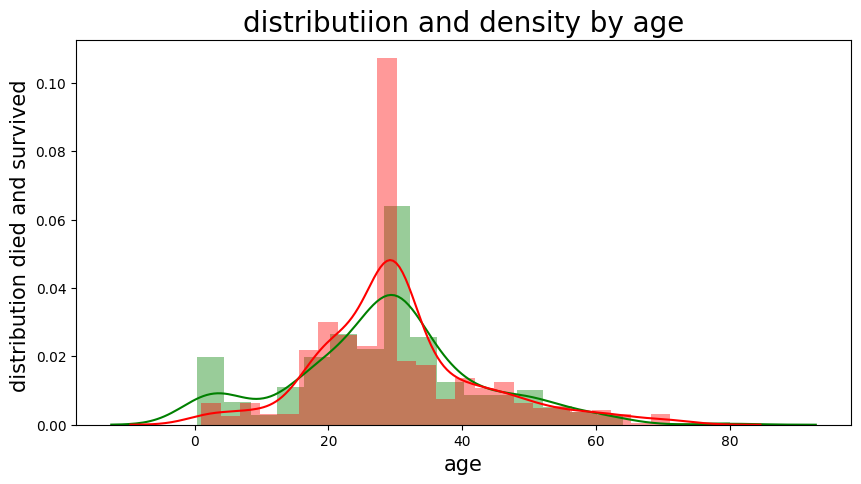

In [28]:
age_died=df[(df["survived"]==0)]
age_surv=df[(df["survived"]==1)]
#figure size
plt.figure(figsize=(10,5))

#ploting the 2 variables that we create and comapre the two
sns.distplot(age_surv["age"],color='g')
sns.distplot(age_died["age"],color='r')
plt.title("distributiion and density by age", fontsize=20)
plt.xlabel("age", fontsize=15)
plt.ylabel("distribution died and survived ", fontsize=15)
plt.show()


Text(0, 0.5, 'died')

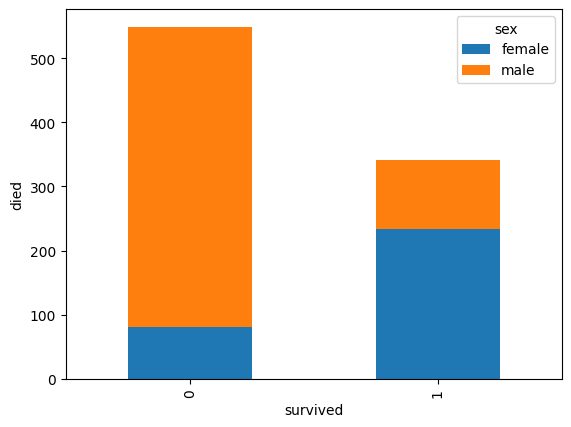

In [30]:
survived_sex_counts=df.groupby(['survived','sex']).size().unstack()
survived_sex_counts.plot(kind='bar',stacked=True)
plt.xlabel('survived')
plt.ylabel('died')


In [31]:
num_females_survived=df[(df["sex"]=="female")&(df["survived"]==1)].shape[0]
num_males_survived=df[(df["sex"]=="male")&(df["survived"]==1)].shape[0]
print("number of females survived",num_females_survived)
print("number of males survived",num_males_survived)



number of females survived 233
number of males survived 109


In [32]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male
0,0,3,male,22.000000,1,0,7.2500,S,True
1,1,1,female,38.000000,1,0,71.2833,C,False
2,1,3,female,26.000000,0,0,7.9250,S,False
3,1,1,female,35.000000,1,0,53.1000,S,False
4,0,3,male,35.000000,0,0,8.0500,S,True
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,True
887,1,1,female,19.000000,0,0,30.0000,S,False
888,0,3,female,29.699118,1,2,23.4500,S,False
889,1,1,male,26.000000,0,0,30.0000,C,True


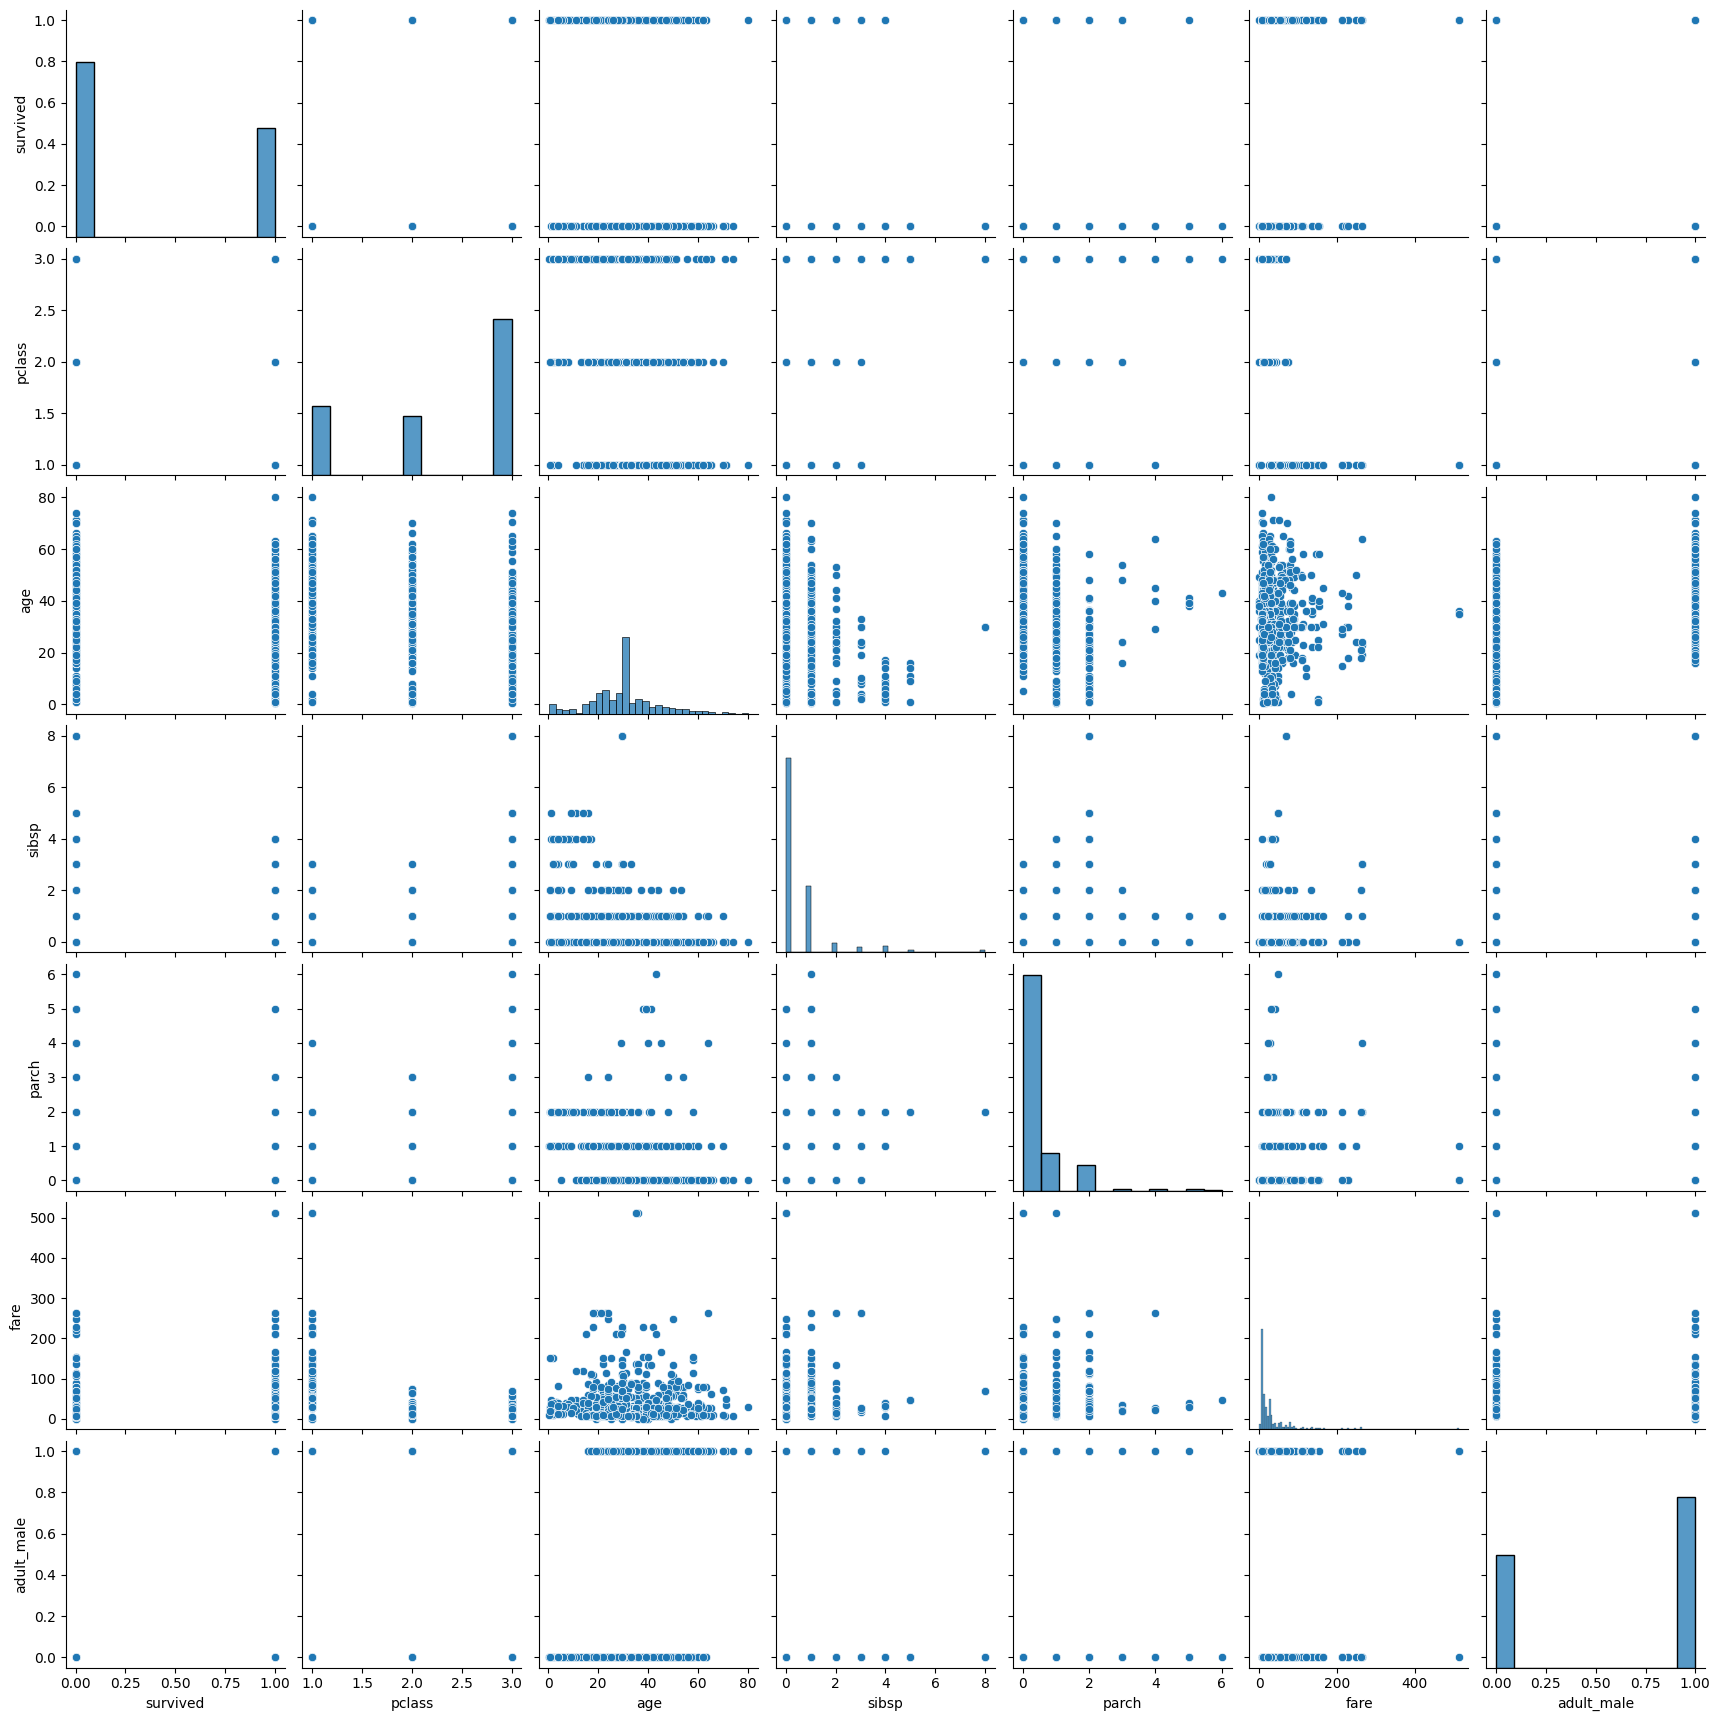

In [29]:
sns.pairplot(df)